In [1]:
import json
import requests
from bs4 import BeautifulSoup
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
df = pd.read_csv('clean_nba_betting_dataframe.csv', index_col='new_index')

In [3]:
df.head()

,gid,team_slug_home,away_home_home,fg_home,fga_home,fg%_home,3p_home,3pa_home,3p%_home,ft_home,...,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,date,betting_line_away,over_under_terms,over_under
new_index,,,,,,,,,,,,,,,,,,,,,
0,201311010ATL,ATL,home,36,77,0.468,10,23,0.435,20,...,15,5,6,12,25,95,2013-11-01,3.5,-113.0,195.0
1,201311090ATL,ATL,home,43,90,0.478,6,19,0.316,12,...,22,9,2,17,24,94,2013-11-09,6.5,-108.0,199.0
2,201311130ATL,ATL,home,35,77,0.455,5,24,0.208,16,...,24,11,3,3,19,95,2013-11-13,4.5,-105.0,201.5
3,201311150ATL,ATL,home,39,81,0.481,10,23,0.435,25,...,21,6,4,16,19,103,2013-11-15,8.5,-105.0,207.0
4,201311200ATL,ATL,home,36,71,0.507,4,15,0.267,17,...,17,13,5,15,21,85,2013-11-20,5.5,-110.0,202.0


Create dummy variables

In [4]:
df['margin_victory_home'] = [0 for i in range(len(df))]
df['margin_loss_away'] = [0 for i in range(len(df))]
df['margin_victory_away'] = [0 for i in range(len(df))]
df['margin_loss_home'] = [0 for i in range(len(df))]
df['game_over_under'] = [0 for i in range(len(df))]

In [5]:
for i in range(len(df)):
    if df['pts_home'][i] > df['pts_away'][i]:
        df.loc[i, 'margin_victory_home'] = df['pts_home'][i] - df['pts_away'][i]
        df.loc[i, 'margin_loss_away'] = df['pts_away'][i] - df['pts_home'][i]
    if df['pts_home'][i] < df['pts_away'][i]:
        df.loc[i, 'margin_loss_home'] = df['pts_home'][i] - df['pts_away'][i]
        df.loc[i, 'margin_victory_away'] = df['pts_away'][i] - df['pts_home'][i]
    if df['pts_home'][i] + df['pts_away'][i] > df['over_under'][i]:
        df.loc[i, 'game_over_under'] = 1

In [6]:
df[['pts_home', 'pts_away', 'over_under', 'game_over_under']]

,pts_home,pts_away,over_under,game_over_under
new_index,,,,
0,102,95,195.0,1
1,104,94,199.0,0
2,91,95,201.5,0
3,113,103,207.0,1
4,93,85,202.0,0
5,87,94,194.5,0
6,92,109,199.0,1
7,88,87,202.0,0
8,107,97,203.5,1


In [7]:
df['game_over_under'].value_counts(normalize=True)

0    0.511382
1    0.488618
Name: game_over_under, dtype: float64

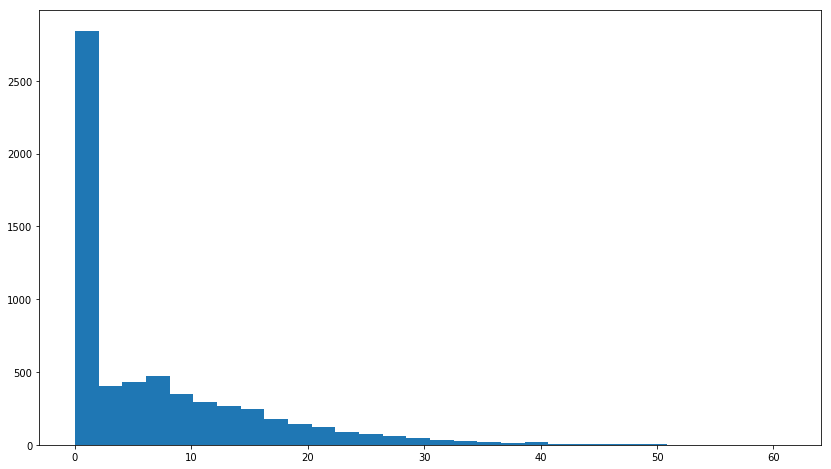

In [8]:
plt.figure(figsize=(14, 8))
plt.hist(df['margin_victory_home'], bins=30);

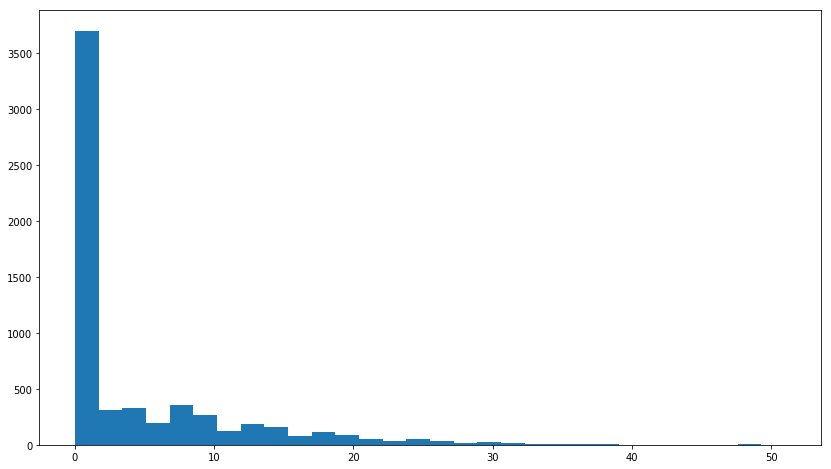

In [9]:
plt.figure(figsize=(14,8))
plt.hist(df['margin_victory_away'], bins=30);

In [10]:
df.head()

,gid,team_slug_home,away_home_home,fg_home,fga_home,fg%_home,3p_home,3pa_home,3p%_home,ft_home,...,pts_away,date,betting_line_away,over_under_terms,over_under,margin_victory_home,margin_loss_away,margin_victory_away,margin_loss_home,game_over_under
new_index,,,,,,,,,,,,,,,,,,,,,
0,201311010ATL,ATL,home,36,77,0.468,10,23,0.435,20,...,95,2013-11-01,3.5,-113.0,195.0,7,-7,0,0,1
1,201311090ATL,ATL,home,43,90,0.478,6,19,0.316,12,...,94,2013-11-09,6.5,-108.0,199.0,10,-10,0,0,0
2,201311130ATL,ATL,home,35,77,0.455,5,24,0.208,16,...,95,2013-11-13,4.5,-105.0,201.5,0,0,4,-4,0
3,201311150ATL,ATL,home,39,81,0.481,10,23,0.435,25,...,103,2013-11-15,8.5,-105.0,207.0,10,-10,0,0,1
4,201311200ATL,ATL,home,36,71,0.507,4,15,0.267,17,...,85,2013-11-20,5.5,-110.0,202.0,8,-8,0,0,0


In [11]:
year_starts = {'2018': '2017-09-01',
               '2017': '2016-09-01',
               '2016': '2015-09-01',
               '2015': '2014-09-01',
               '2014': '2013-09-01'}

In [12]:
def team_df_create(data, team, year):
    teams_games = []
    for i, row in enumerate(data['team_slug_home']):
        if row == team:
            teams_games.append(df.loc[i])
        elif data['team_slug_away'][i] == team:
            teams_games.append(df.loc[i])
    years_games = [x for x in teams_games if x[43] > year_starts[year]]
    return pd.DataFrame(years_games, columns=df.columns, index=range(0,82))

In [13]:
atl_df_2018 = team_df_create(df, 'ATL', '2018')

In [14]:
atl_df_2018['atl_bet_won'] = [0 for i in range(len(atl_df_2018))]


In [15]:
atl_df_2018['margin_loss_home'][1] + atl_df_2018['betting_line_home'][1] > 0

False

In [16]:
for i in range(len(atl_df_2018)):
    if atl_df_2018['team_slug_home'][i] == 'ATL':
        if atl_df_2018['pts_home'][i] > atl_df_2018['pts_away'][i]:
            if atl_df_2018['margin_victory_home'][i] + atl_df_2018['betting_line_home'][i] > 0:
                atl_df_2018.loc[i, 'atl_bet_won'] = 1
            if atl_df_2018['margin_victory_home'][i] + atl_df_2018['betting_line_home'][i] == 0:
                atl_df_2018.loc[i, 'atl_bet_won'] = 'Push'
        if atl_df_2018['pts_home'][i] < atl_df_2018['pts_away'][i]:
            if atl_df_2018['margin_loss_home'][i] + atl_df_2018['betting_line_home'][i] > 0:
                atl_df_2018.loc[i, 'atl_bet_won'] = 1
            if atl_df_2018['margin_loss_home'][i] + atl_df_2018['betting_line_home'][i] == 0:
                atl_df_2018.loc[i, 'atl_bet_won'] = 'Push'

In [20]:
for i in range(len(atl_df_2018)):
    if atl_df_2018['team_slug_away'][i] == 'ATL':
        if atl_df_2018['pts_home'][i] > atl_df_2018['pts_away'][i]:
            if atl_df_2018['margin_loss_away'][i] + atl_df_2018['betting_line_away'][i] > 0:
                atl_df_2018.loc[i, 'atl_bet_won'] = 1
            if atl_df_2018['margin_loss_away'][i] + atl_df_2018['betting_line_away'][i] == 0:
                atl_df_2018.loc[i, 'atl_bet_won'] = 'Push'
        if atl_df_2018['pts_home'][i] < atl_df_2018['pts_away'][i]:
            if atl_df_2018['margin_victory_away'][i] + atl_df_2018['betting_line_away'][i] > 0:
                atl_df_2018.loc[i, 'atl_bet_won'] = 1
            if atl_df_2018['margin_victory_away'][i] + atl_df_2018['betting_line_away'][i] == 0:
                atl_df_2018.loc[i, 'atl_bet_won'] = 'Push'

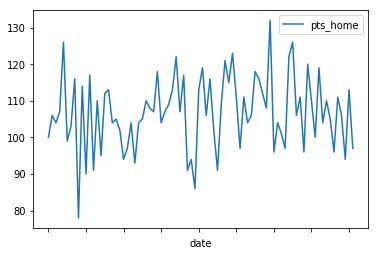

In [17]:
atl_df_2018.plot(x='date', y='pts_home')

In [21]:
atl_df_2018[['pts_home', 'pts_away', 'betting_line_home', 'margin_victory_home', 'margin_loss_home', 'atl_bet_won']].head()

,pts_home,pts_away,betting_line_home,margin_victory_home,margin_loss_home,atl_bet_won
0,100,105,7.0,0,-5,1
1,106,117,5.5,0,-11,0
2,104,119,9.0,0,-15,0
3,107,110,7.5,0,-3,1
4,126,80,-5.0,46,0,1


In [22]:
atl_df_2018['atl_bet_won'].value_counts()

1       40
0       39
Push     3
Name: atl_bet_won, dtype: int64